In [1]:
import numpy as np
import pandas as pd
import matplotlib as sns
import seaborn as sns
import plotly.express as px


In [2]:
df=pd.read_csv('loan_approval_dataset.csv')
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [4]:
df.drop('loan_id',axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder
col= [' education', ' self_employed', ' loan_status']
encoder =LabelEncoder()
for x in col: 
    df[x]=encoder.fit_transform(df[x])
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [6]:
x=df.drop(' loan_status', axis=1)
y=df[' loan_status']

In [7]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2, random_state=1)

In [8]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression(solver ='newton-cg')
model1.fit(xtrain,ytrain)

C:\Users\lucky\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:99: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
C:\Users\lucky\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:318: ConvergenceWarning: newton-cg failed to converge at loss = 0.4347272623439341. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       521
           1       0.81      0.55      0.65       333

    accuracy                           0.77       854
   macro avg       0.79      0.73      0.74       854
weighted avg       0.78      0.77      0.76       854

0.7740046838407494
0.8097345132743363
0.5495495495495496
0.6547406082289803


<Axes: >

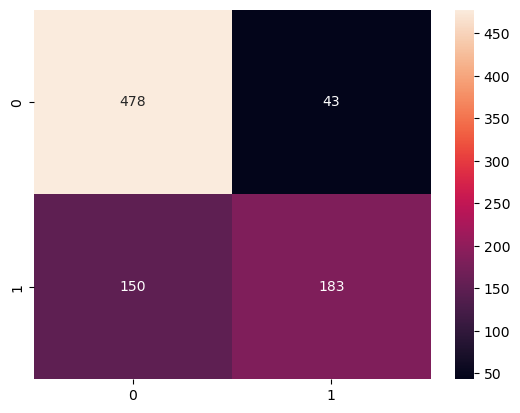

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred1=model1.predict(xtest)
print(classification_report(ytest,pred1))
print(accuracy_score(ytest,pred1))
print(precision_score(ytest,pred1))
print(recall_score(ytest,pred1))
print(f1_score(ytest,pred1))
cm1=confusion_matrix(ytest,pred1)
sns.heatmap(cm1,annot=True,fmt='0.5g')

In [10]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       521
           1       0.97      0.98      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

0.9836065573770492
0.973293768545994
0.984984984984985
0.9791044776119403


<Axes: >

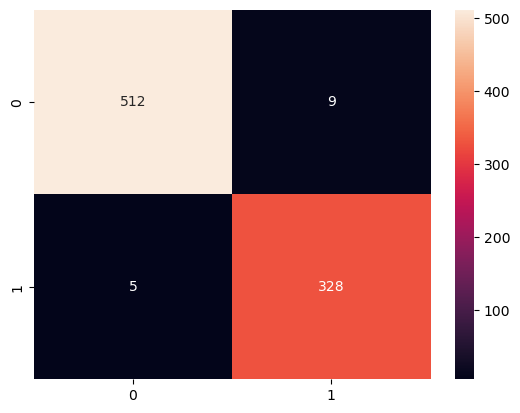

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred2=model2.predict(xtest)
print(classification_report(ytest,pred2))
print(accuracy_score(ytest,pred2))
print(precision_score(ytest,pred2))
print(recall_score(ytest,pred2))
print(f1_score(ytest,pred2))
cm1=confusion_matrix(ytest,pred2)
sns.heatmap(cm1,annot=True,fmt='0.5g')

In [12]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       521
           1       0.98      0.97      0.98       333

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

0.9824355971896955
0.9818181818181818
0.972972972972973
0.9773755656108597


<Axes: >

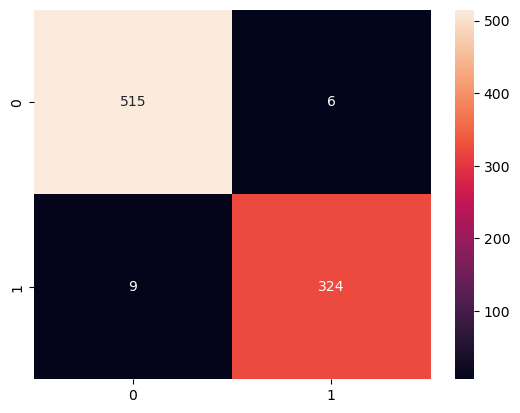

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
pred3=model3.predict(xtest)
print(classification_report(ytest,pred3))
print(accuracy_score(ytest,pred3))
print(precision_score(ytest,pred3))
print(recall_score(ytest,pred3))
print(f1_score(ytest,pred3))
cm1=confusion_matrix(ytest,pred3)
sns.heatmap(cm1,annot=True,fmt='0.5g')

In [14]:
import joblib

In [17]:
joblib.dump({'model':model3,
             'encoder':encoder,
             'features_column':list(x.columns),
             'target_column':' loan_status'},
             'complete_RF_model.joblib')

['complete_RF_model.joblib']